In [452]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [453]:

# Carregar o arquivo CSV em um DataFrame
df = pd.read_csv('characters.csv', na_values=['NA', 'none'])

In [454]:
# Exibe um título para a seção de informações gerais do conjunto de dados
print("Descrição do Conjunto de Dados: Star Wars Characters")

# Texto explicativo sobre o conjunto de dados
print("Este conjunto de dados contém informações sobre personagens do universo Star Wars.")
print("Ele foi obtido a partir do Kaggle e inclui dados como altura, massa, cor do cabelo, cor da pele, cor dos olhos, ano de nascimento, gênero, planeta natal e espécie.")
print("Kaggle (https://www.kaggle.com/datasets/jsphyg/star-wars?select=characters.csv)")
print(f"Tamanho: {df.shape[0]} registros x {df.shape[1]} colunas")
print("Quantidade de Registros:", df.shape[0])
print("Linhas x Colunas:", df.shape)
print("\nPrimeiras 5 linhas:")
display(df.head())



Descrição do Conjunto de Dados: Star Wars Characters
Este conjunto de dados contém informações sobre personagens do universo Star Wars.
Ele foi obtido a partir do Kaggle e inclui dados como altura, massa, cor do cabelo, cor da pele, cor dos olhos, ano de nascimento, gênero, planeta natal e espécie.
Kaggle (https://www.kaggle.com/datasets/jsphyg/star-wars?select=characters.csv)
Tamanho: 87 registros x 10 colunas
Quantidade de Registros: 87
Linhas x Colunas: (87, 10)

Primeiras 5 linhas:


,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species
0,Luke Skywalker,172.0,77,blond,fair,blue,19BBY,male,Tatooine,Human
1,C-3PO,167.0,75,NaN,gold,yellow,112BBY,NaN,Tatooine,Droid
2,R2-D2,96.0,32,NaN,"white, blue",red,33BBY,NaN,Naboo,Droid
3,Darth Vader,202.0,136,NaN,white,yellow,41.9BBY,male,Tatooine,Human
4,Leia Organa,150.0,49,brown,light,brown,19BBY,female,Alderaan,Human


In [455]:
# Contagem de dados faltantes por coluna
dados_faltantes = df.isnull().sum()

# Exibir tabela com colunas que possuem valores faltantes
print("\nColunas com Valores Faltantes:")
colunas_com_faltantes = dados_faltantes[dados_faltantes > 0].index
for coluna in colunas_com_faltantes:
    print(f"{coluna}: {dados_faltantes[coluna]} valores faltantes")






Colunas com Valores Faltantes:
height: 6 valores faltantes
mass: 28 valores faltantes
hair_color: 43 valores faltantes
skin_color: 3 valores faltantes
eye_color: 3 valores faltantes
birth_year: 44 valores faltantes
gender: 5 valores faltantes
homeworld: 10 valores faltantes
species: 5 valores faltantes


In [456]:
# Encontre as coordenadas dos valores faltantes
coordenadas_faltantes = []
for coluna in df.columns:
    for indice, valor in df[coluna].items():
        if pd.isnull(valor):
            coordenadas_faltantes.append((indice, coluna))

# Crie um DataFrame com as coordenadas dos valores faltantes
df_coord_faltantes = pd.DataFrame(coordenadas_faltantes, columns=['Índice', 'Coluna'])

# Exiba o DataFrame de coordenadas dos valores faltantes de maneira organizada
print("\nCoordenadas dos Valores Faltantes:")
print(df_coord_faltantes.to_string(index=False))


Coordenadas dos Valores Faltantes:
 Índice     Coluna
     27     height
     81     height
     82     height
     83     height
     84     height
     85     height
     11       mass
     26       mass
     27       mass
     32       mass
     35       mass
     36       mass
     37       mass
     39       mass
     40       mass
     42       mass
     45       mass
     50       mass
     52       mass
     53       mass
     55       mass
     57       mass
     58       mass
     62       mass
     64       mass
     69       mass
     70       mass
     72       mass
     74       mass
     81       mass
     82       mass
     83       mass
     84       mass
     85       mass
      1 hair_color
      2 hair_color
      3 hair_color
      7 hair_color
     14 hair_color
     15 hair_color
     21 hair_color
     22 hair_color
     24 hair_color
     25 hair_color
     29 hair_color
     31 hair_color
     33 hair_color
     34 hair_color
     35 hair_color
     38 hair_c

In [457]:
# Remover valores 'NA' e converter colunas numéricas para tipos apropriados
df['mass'] = pd.to_numeric(df['mass'], errors='coerce')
df['height'] = pd.to_numeric(df['height'], errors='coerce')

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


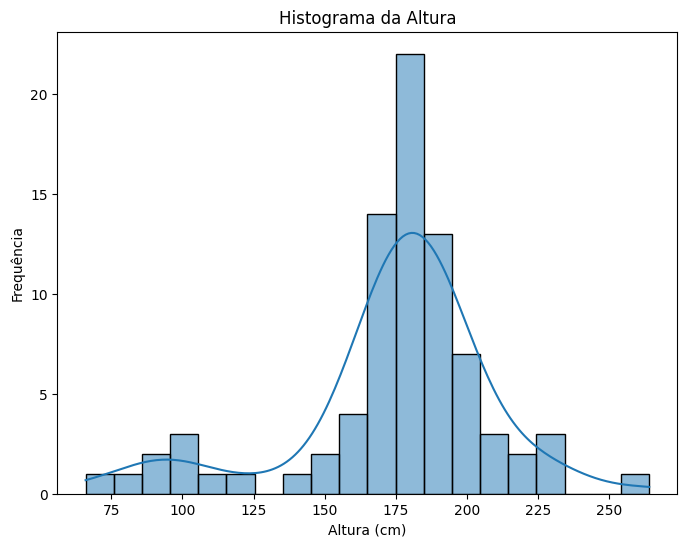

In [458]:
# Histograma da Altura
plt.figure(figsize=(8, 6))
sns.histplot(df['height'].dropna(), bins=20, kde=True)
plt.title('Histograma da Altura')
plt.xlabel('Altura (cm)')
plt.ylabel('Frequência')
plt.show()

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


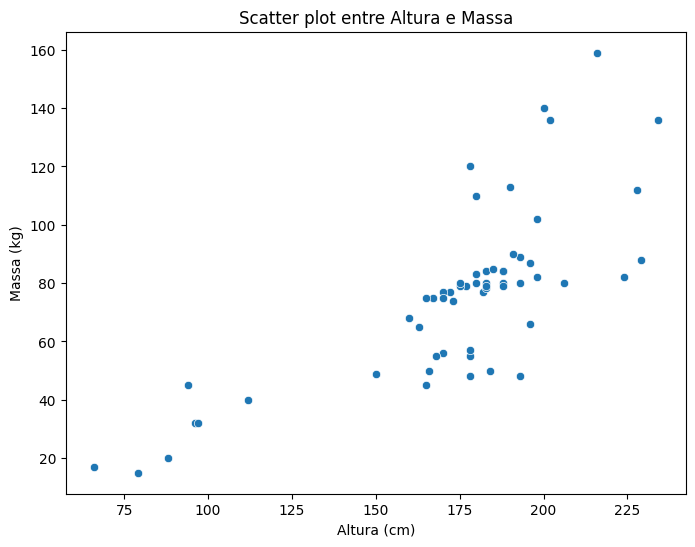

In [459]:

# Scatter plot entre Altura e Massa
plt.figure(figsize=(8, 6))
sns.scatterplot(x='height', y='mass', data=df.dropna(subset=['height', 'mass']))
plt.title('Scatter plot entre Altura e Massa')
plt.xlabel('Altura (cm)')
plt.ylabel('Massa (kg)')
plt.show()

In [460]:
# Imprime estatísticas descritivas das variáveis numéricas
print('\nEstatísticas descritivas das variáveis numéricas:')
print(f"Altura:")
print(f"  Média: {estatisticas_numericas['height']['mean']:.2f} cm")
print(f"  Mediana: {estatisticas_numericas['height']['50%']:.2f} cm")
print(f"  Variância: {estatisticas_numericas['height']['std'] ** 2:.2f}")
print(f"  Desvio Padrão: {estatisticas_numericas['height']['std']:.2f}")
print("\nMassa:")
if 'mass' in estatisticas_numericas:
    print(f"  Média: {estatisticas_numericas['mass']['mean']:.2f} kg")
    print(f"  Mediana: {estatisticas_numericas['mass']['50%']:.2f} kg")
    print(f"  Variância: {estatisticas_numericas['mass']['std'] ** 2:.2f}")
    print(f"  Desvio Padrão: {estatisticas_numericas['mass']['std']:.2f}")
else:
    print("  Não há dados numéricos na coluna 'mass'")



    


Estatísticas descritivas das variáveis numéricas:
Altura:
  Média: 174.36 cm
  Mediana: 180.00 cm
  Variância: 1208.98
  Desvio Padrão: 34.77

Massa:
  Média: 75.58 kg
  Mediana: 79.00 kg
  Variância: 855.71
  Desvio Padrão: 29.25
